# Task - 2

# Stock Prediction: Take stock price of any company you want and predicts its price by using LSTM. Use only Jupyter notebook code.

# Step 1: Loading the data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input

In [2]:
# Download stock data
df = pd.read_csv('AAPL_stock_data.csv', index_col='Date', parse_dates=True)
df = df[['Close']]
df

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2022-12-23,131.860001
2022-12-27,130.029999
2022-12-28,126.040001


In [3]:
# making index is a DatetimeIndex
# df.index = pd.to_datetime(df.index)

df

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2022-12-23,131.860001
2022-12-27,130.029999
2022-12-28,126.040001


# Step 2: Data Preprocessing

In [4]:
# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [5]:
# Prepare training and testing datasets
training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 60:, :]

In [6]:
# Create training dataset
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [7]:
# Create testing dataset
x_test = []
y_test = df[training_data_len:].values
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Step 3: Building the LSTM Model

In [8]:
# Build LSTM model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Training the Model

In [10]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2558/2558 ━━━━━━━━━━━━━━━━━━━━ 49s 18ms/step - loss: 9.0541e-04


# Step 5: Making Predictions

In [11]:
# Predict the stock prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


# Step 6: Evaluating and Visualizing

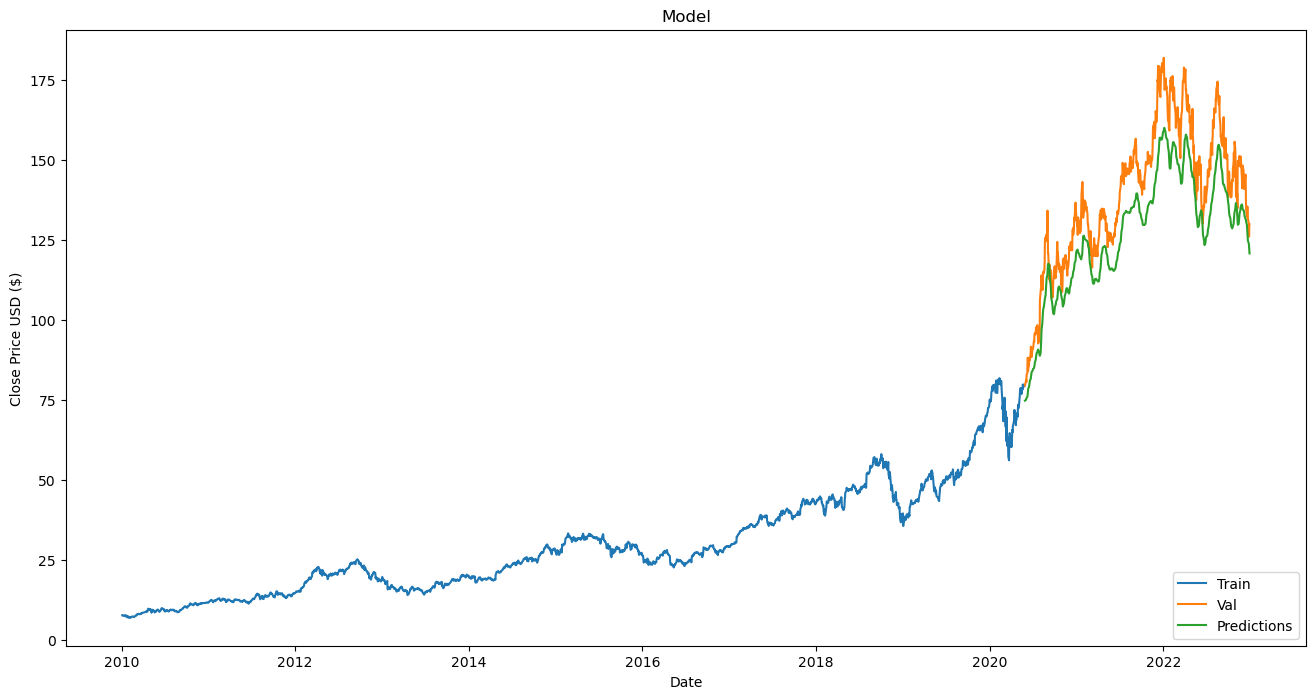

In [12]:
pd.set_option("mode.copy_on_write", True)
pd.options.mode.copy_on_write = True
# Plot the results
train = df[:training_data_len]
valid = df[training_data_len:]
valid.loc[:,'Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [13]:
# Print the predicted and actual prices
valid

,Close,Predictions
Date,,
2020-05-29,79.485001,74.748482
2020-06-01,80.462502,74.855522
2020-06-02,80.834999,75.004913
2020-06-03,81.279999,75.196236
2020-06-04,80.580002,75.431290
...,...,...
2022-12-23,131.860001,124.826813
2022-12-27,130.029999,123.869255
2022-12-28,126.040001,122.908676


# Step 7: Predicting the next 30 days stock

In [14]:
# Prepare for the next 30 days prediction
last_60_days = df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_input = np.reshape(last_60_days_scaled, (1, last_60_days_scaled.shape[0], 1))

C:\Users\abhiroop\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [15]:
# Predict the next 30 days
future_predictions = []
for _ in range(30):
    next_pred = model.predict(X_input)
    future_predictions.append(next_pred[0, 0])
    new_input = np.append(X_input[0, 1:], next_pred, axis=0)
    X_input = np.reshape(new_input, (1, new_input.shape[0], 1))

future_predictions = np.array(future_predictions)
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

In [16]:
# Create a dataframe for future predictions
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted Close'])

In [17]:
# Print the predicted prices for the next 30 days
print(future_df)

            Predicted Close
2023-01-02       120.099823
2023-01-03       118.878250
2023-01-04       117.350555
2023-01-05       115.653496
2023-01-06       113.871284
2023-01-09       112.055527
2023-01-10       110.237534
2023-01-11       108.436165
2023-01-12       106.662422
2023-01-13       104.922653
2023-01-16       103.220276
2023-01-17       101.556900
2023-01-18        99.933067
2023-01-19        98.348724
2023-01-20        96.803368
2023-01-23        95.296303
2023-01-24        93.826675
2023-01-25        92.393562
2023-01-26        90.996002
2023-01-27        89.633018
2023-01-30        88.303658
2023-01-31        87.006905
2023-02-01        85.741829
2023-02-02        84.507500
2023-02-03        83.302979
2023-02-06        82.127396
2023-02-07        80.979858
2023-02-08        79.859558
2023-02-09        78.765671
2023-02-10        77.697418


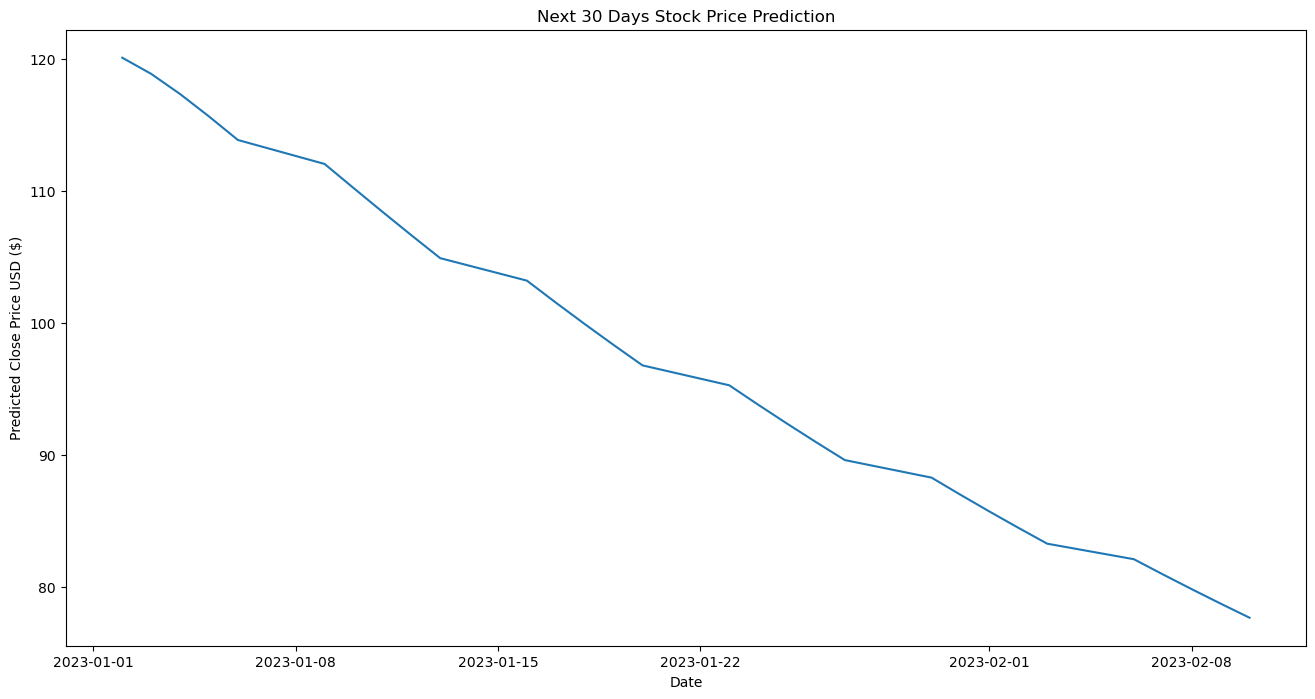

In [18]:
# Plot the future predictions
plt.figure(figsize=(16, 8))
plt.title('Next 30 Days Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Predicted Close Price USD ($)')
plt.plot(future_df)
plt.show()

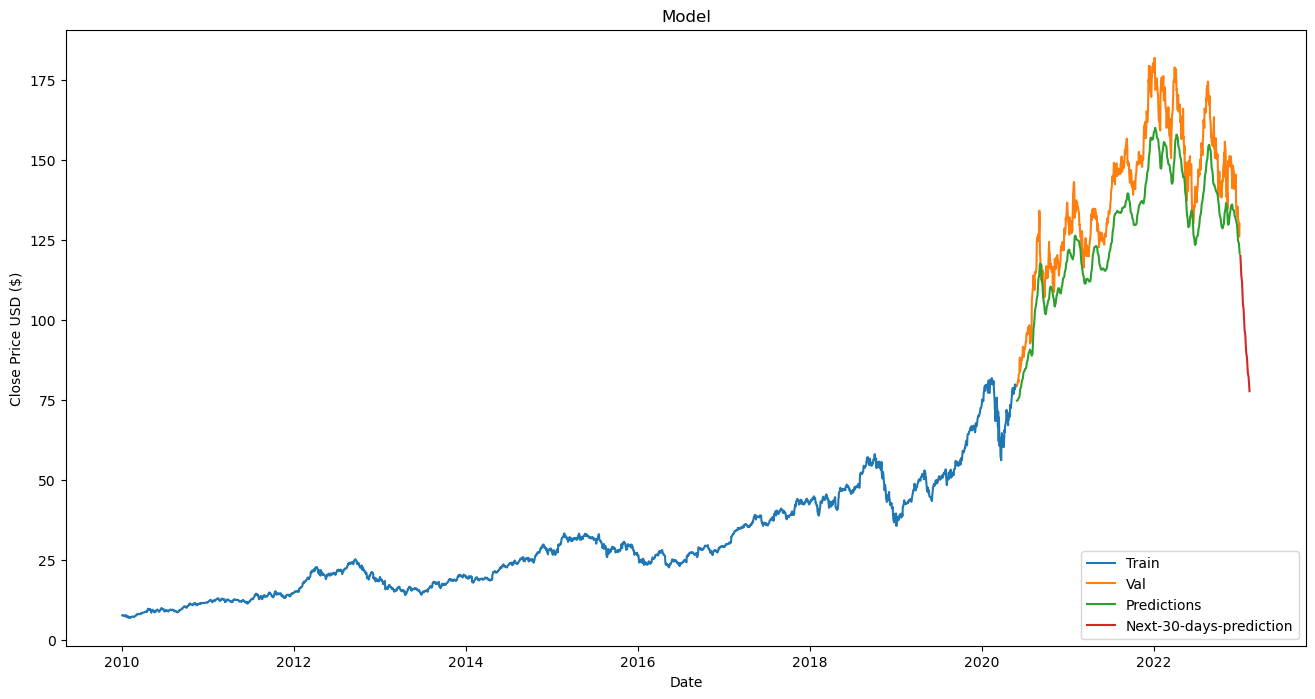

In [19]:
# Ploting the plot graph for the predicted data with the actual data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.plot(future_df)
plt.legend(['Train', 'Val', 'Predictions','Next-30-days-prediction'], loc='lower right')
plt.show()